## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [8]:
# Compute mean values for all columns
mean_values = df.mean()

# Compute variances for all columns
variance_values = df.var()

# Display mean values
print("Mean values:")
print(mean_values)

# Display variances
print("\nVariance values:")
print(variance_values)


Mean values:
AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

Variance values:
AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

In [12]:
print(df.columns)


Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')


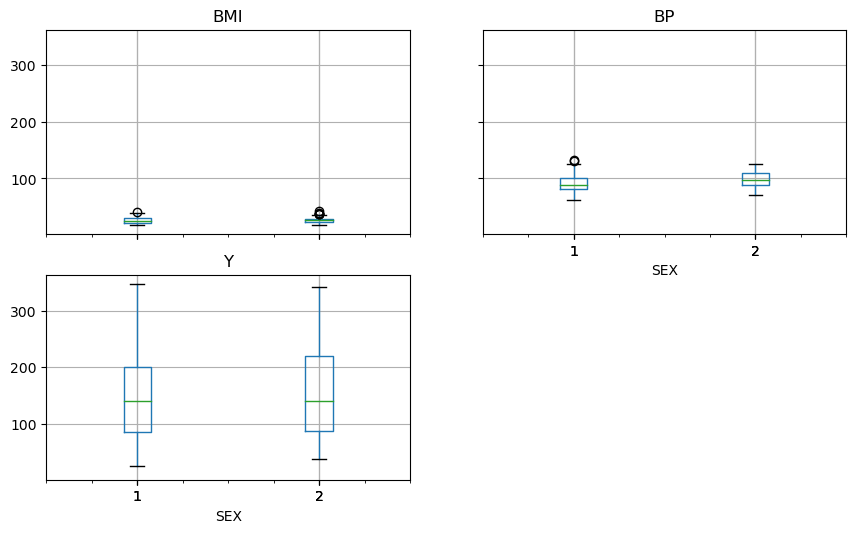

In [13]:
import matplotlib.pyplot as plt

# Plot boxplots for BMI, BP, and Y depending on gender
df.boxplot(column=['BMI', 'BP', 'Y'], by='SEX', figsize=(10, 6))
plt.title('Boxplots of BMI, BP, and Y by Gender')
plt.xlabel('Gender')
plt.ylabel('Value')
plt.suptitle('')  # Suppress default title
plt.show()


### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

In [14]:
# 1. Age Distribution
age_summary = df['AGE'].describe()
print("Age Summary Statistics:")
print(age_summary)

Age Summary Statistics:
count    442.000000
mean      48.518100
std       13.109028
min       19.000000
25%       38.250000
50%       50.000000
75%       59.000000
max       79.000000
Name: AGE, dtype: float64


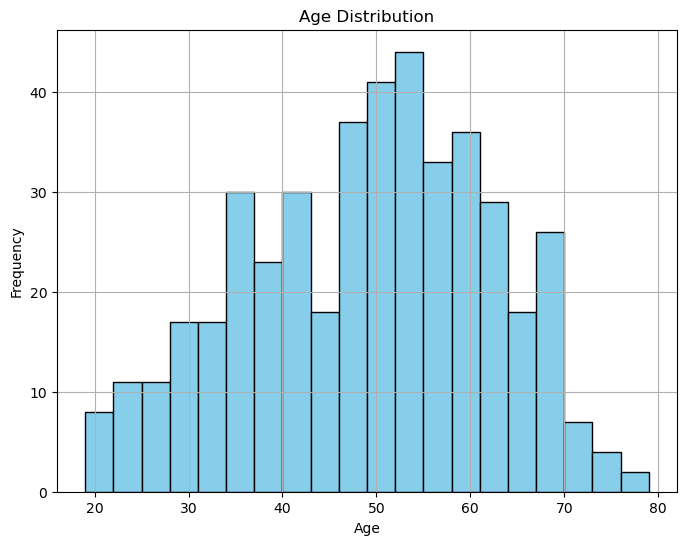

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
# 2. Sex Distribution
sex_counts = df['SEX'].value_counts()
print("\nSex Distribution:")
print(sex_counts)


Sex Distribution:
1    235
2    207
Name: SEX, dtype: int64


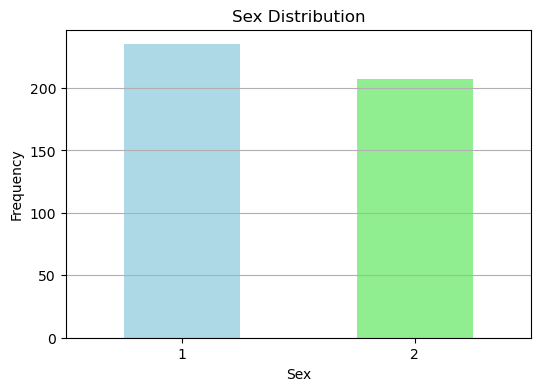

In [17]:
plt.figure(figsize=(6, 4))
sex_counts.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [18]:
# 3. BMI Distribution
bmi_summary = df['BMI'].describe()
print("\nBMI Summary Statistics:")
print(bmi_summary)


BMI Summary Statistics:
count    442.000000
mean      26.375792
std        4.418122
min       18.000000
25%       23.200000
50%       25.700000
75%       29.275000
max       42.200000
Name: BMI, dtype: float64


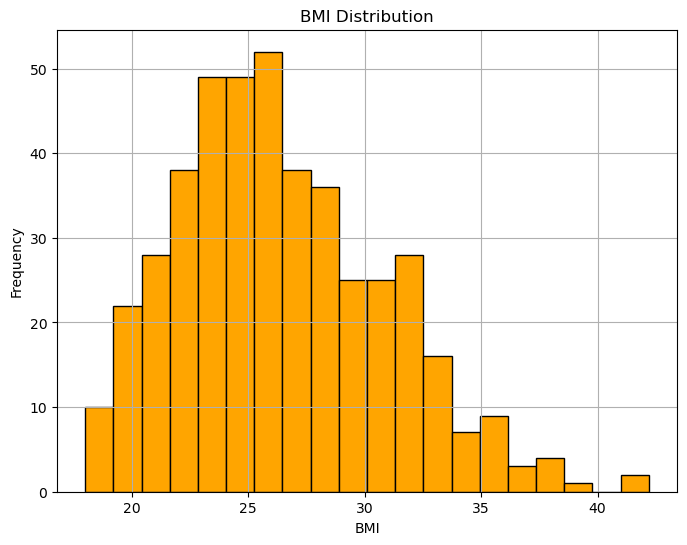

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(df['BMI'], bins=20, color='orange', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
# 4. Y Distribution
y_summary = df['Y'].describe()
print("\nY Summary Statistics:")
print(y_summary)


Y Summary Statistics:
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64


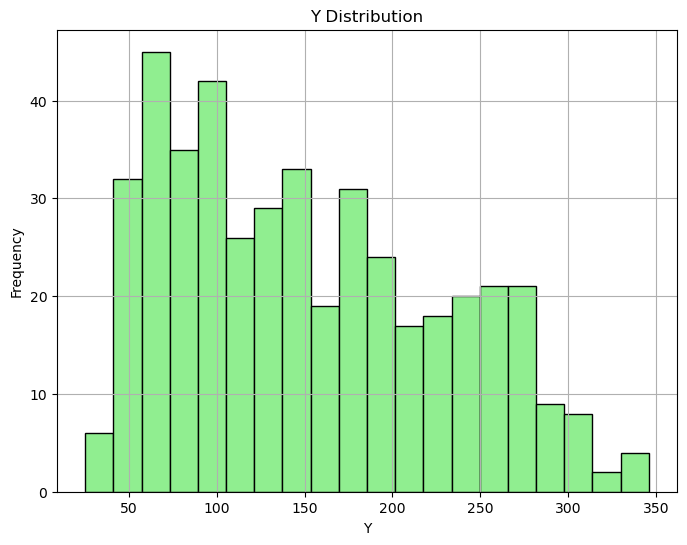

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['Y'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Y Distribution')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [22]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlation of variables with disease progression (Y)
correlation_with_y = correlation_matrix['Y'].drop('Y')  # Exclude Y column since we're interested in other variables

print("Correlation with Disease Progression (Y):")
print(correlation_with_y)


Correlation with Disease Progression (Y):
AGE    0.187889
SEX    0.043062
BMI    0.586450
BP     0.441482
S1     0.212022
S2     0.174054
S3    -0.394789
S4     0.430453
S5     0.565883
S6     0.382483
Name: Y, dtype: float64


### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [23]:
from scipy import stats

# Extract diabetes progression (Y) for men and women
y_men = df[df['SEX'] == 1]['Y']
y_women = df[df['SEX'] == 2]['Y']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(y_men, y_women)

print("Independent Samples t-test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis. There is a statistically significant difference in the degree of diabetes progression between men and women.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no statistically significant difference in the degree of diabetes progression between men and women.")


Independent Samples t-test Results:
t-statistic: -0.9041147550244715
p-value: 0.3664292946519826

Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in the degree of diabetes progression between men and women.
